# Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np

# Carregando dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

# Explorando dados

In [3]:
imagens_treino.shape ## mostra a quantidade de elementos do treino e que eles tão numa matriz 28x28
imagens_teste.shape ## mostra a quantidade de elementos do teste e que eles tão numa matriz 28x28
len(identificacoes_treino) ## mostra a quantidade de elementos da identifacação
identificacoes_treino.min() #descobre qual o menor valor de classificação
identificacoes_treino.max() #descobre qual o maior valor de classificação

9

# Exibir os dados

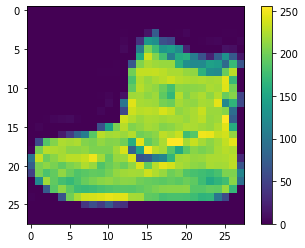

In [4]:
nomes_das_identificacoes = ['camiseta','calça', 'pullover', 'vestido', 
                            'casaco', 'sandália', 'camisa', 'tênis', 'bolsa', 'bota']

#plt.imshow(imagens_treino[0])
#plt.title(identificacoes_treino[0])
'''
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem], cmap=plt.cm.gray)
    plt.title(nomes_das_identificacoes[identicacoes_treino[imagem]])
'''

plt.imshow(imagens_treino[0])
plt.colorbar()

# Criando o modelo e treinando

In [23]:
#normalização
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #camada 0 - entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #camada 1 - processamento 
    #keras.layers.Dropout(0.2), #camada para "adormecer" alguns processamentos
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) #camada 2 - saída
])

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'), #monitora a perda de validação para parar o treino cedo
            keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', #salva os dados do melhor modelo num arquivo
                                          monitor='val_loss', #monitora a perda de validação para parar o modelo no melhor momento
                                          save_best_only = True)] #Ativa save_best_only
adam = keras.optimizers.Adam(lr=0.01) #lr = taxa de aprendizado 

modelo.compile(optimizer = adam,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
            batch_size = 480, #determina um conjunto de dados por vez , bom para diminuir o tempo de treinamento
            epochs=5, #epochs = qtd  de vezes para treinar
           validation_split = 0.2, #validation_split separa 20% para validação
            callbacks = callbacks) #para o treinamento de o val_loss não mudar
                                                                                    

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 21us/sample - loss: 2.3032 - accuracy: 0.1014 - val_loss: 2.3033 - val_accuracy: 0.0995
Epoch 2/5
48000/48000 [==============================] - 1s 12us/sample - loss: 2.3029 - accuracy: 0.1014 - val_loss: 2.3040 - val_accuracy: 0.0983


# Sumário do Modelo

In [6]:
#resumo do modelo
sumario_modelo = modelo.summary()
sumario_modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Pesos da primeira camada Dense
Pesos tentam aproximar a curva do ideal

In [7]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 4.6445355e-03,  5.1470608e-02,  2.0420559e-02, ...,
         6.4651653e-02,  5.9966102e-02, -6.2408961e-02],
       [-7.1378298e-02, -3.3243511e-02,  5.4358944e-02, ...,
         1.7893113e-02, -1.7714448e-02,  4.2292528e-02],
       [ 1.7415732e-04, -4.3060780e-03,  3.6013482e+00, ...,
        -4.4046931e+00, -2.7604345e-02,  9.3933970e-01],
       ...,
       [-4.1883979e+00,  1.3436824e-03,  4.9098959e+00, ...,
         4.7308445e+00, -4.1107750e+00,  6.1113626e-02],
       [-4.3920522e+00,  6.4853013e-02, -3.5170460e+00, ...,
        -1.9647669e+00, -1.8757179e-01, -3.9199376e+00],
       [-3.6045535e+00,  2.8927781e-02,  4.3565693e+00, ...,
         4.8643575e+00, -4.4410232e-01,  1.7032906e-02]], dtype=float32)

# Vieses da primeira camada Dense
Vies é a distância de um ponto para a curva ideal

In [8]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

# Deixando os dados de entrada simétricos, mas o que queremos é eles como assimétricos

In [9]:
#normalização
imagens_treino = imagens_treino/float(255)

modelo_simetrico = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #camada 0 - entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #camada 1 - processamento 
    #keras.layers.Dropout(0.2), #camada para "adormecer" alguns processamentos
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) #camada 2 - saída
])

#pesos_camada_dense_zerados = np.zeros((784,256))
pesos_camada_dense_aleatorios = np.random.rand(784,256)


modelo_simetrico.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)
modelo_simetrico.layers[1].get_weights()

[array([[0.45173168, 0.5702245 , 0.587234  , ..., 0.83316034, 0.9385891 ,
         0.21092188],
        [0.79689354, 0.38333714, 0.3268724 , ..., 0.36016592, 0.8752725 ,
         0.23873593],
        [0.5970558 , 0.40001935, 0.6560318 , ..., 0.73890865, 0.08757753,
         0.63055795],
        ...,
        [0.6765933 , 0.31771475, 0.25289208, ..., 0.86956877, 0.07907087,
         0.09081654],
        [0.8796356 , 0.3178082 , 0.58318317, ..., 0.5357527 , 0.44133687,
         0.881769  ],
        [0.8777748 , 0.417136  , 0.96186703, ..., 0.58941513, 0.8009331 ,
         0.14565676]], dtype=float32),
 array([ -2.0258415 ,  -5.519137  ,  -2.3911545 ,  -4.7206154 ,
         -4.2034264 ,  -5.4098105 ,  -7.6273055 ,  -4.715949  ,
         -4.203481  ,  -2.098525  ,  -4.2028236 ,  -3.4007494 ,
         -1.6238195 ,  -4.2033567 , -21.216211  , -13.077239  ,
         -4.8214607 ,  -1.9464456 ,  -3.1613476 ,  -3.6758122 ,
         -2.439414  ,  -2.8154945 ,  -4.3336325 ,  -4.519084  ,
         -

# Pegando informações da configuração do modelo

In [10]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_nam

# Salvando o modelo e carregando

In [11]:
from tensorflow.keras.models import load_model

modelo.save("modelo.h5")
modelo_salvo = load_model("modelo.h5")

# plotando o gráfico de Acuracia x épocas

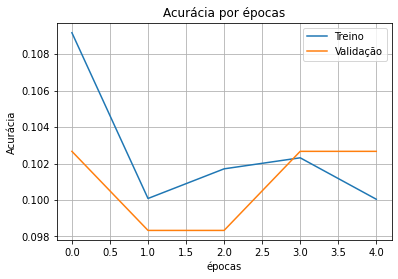

In [12]:
plt.plot(historico.history['accuracy']) # acuráciado teste
plt.plot(historico.history['val_accuracy']) #acurácia da validação
plt.title("Acurácia por épocas")
plt.xlabel("épocas")
plt.ylabel("Acurácia")
plt.legend(["Treino", "Validação"])
plt.grid()

# plotando o gráfico de Perda x épocas

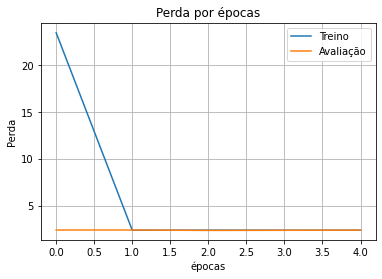

In [13]:
plt.plot(historico.history['loss']) # acuráciado teste
plt.plot(historico.history['val_loss']) #acurácia da validação
plt.title("Perda por épocas")
plt.xlabel("épocas")
plt.ylabel("Perda")
plt.legend(["Treino", "Avaliação"])
plt.grid()

# Testando o modelo

In [14]:
previsoes = modelo.predict(imagens_teste)
resultado = np.argmax(previsoes[0])
print("Resultado teste:", resultado)
print("Número da imagem: ", identificacoes_treino[0])

Resultado teste: 2
Número da imagem:  9


# Avaliando o modelo

In [15]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print("Perda do teste = %.3f     Acurácia do teste = %.3f" % (perda_teste, acuracia_teste))

10000/10000 [==============================] - 0s 34us/sample - loss: 5.4326 - accuracy: 0.1000
Perda do teste = 5.433     Acurácia do teste = 0.100


# Testando o modelo salvo

In [16]:
previsoes = modelo_salvo.predict(imagens_teste)
resultado = np.argmax(previsoes[0])
print("Resultado teste:", resultado)
print("Número da imagem: ", identificacoes_treino[0])

Resultado teste: 2
Número da imagem:  9
